In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [4]:
data = pd.read_csv('Chicago-Covid-SocioDemographics-Cases-Deaths.csv')

In [6]:
data.head()

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.15,17196,200.75
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,4.69,2.99,0.61,0.00,91.67,0.03,278,3.14,24130,272.61
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,42.45,11.93,0.98,0.00,44.29,0.34,130,3.06,4235,99.80
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,38.17,19.04,1.60,0.50,38.03,2.65,89,1.68,11074,209.11
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,1.55,2.46,0.89,0.00,94.89,0.21,182,2.86,14030,220.32


In [155]:
cormat = data.corr().abs()
cormat = cormat[cormat>0.5]
feature_importance = round(cormat,2).dropna(subset=['Death Counts(Per 1000)'])['Death Counts(Per 1000)'].to_frame().reset_index()
feature_importance = feature_importance[:-2]
feature_importance = feature_importance.sort_values(by='Death Counts(Per 1000)')

print(feature_importance)

                                 index  Death Counts(Per 1000)
20                    Latin America(%)                    0.50
4                             Asian(%)                    0.51
14                        No Degree(%)                    0.52
8                      Drove Alone (%)                    0.52
10               Persons per household                    0.53
6        Median household income (USD)                    0.54
3                             Black(%)                    0.54
5              Per capita income (USD)                    0.58
9                           Walked (%)                    0.58
2                             White(%)                    0.59
12            Moved Since Prev Year(%)                    0.59
13             Same House Prev Year(%)                    0.59
18                        Post-grad(%)                    0.63
0                          Under 18(%)                    0.63
19                             Asia(%)                 

# Random Forest Analysis

In [333]:
data_input = data.iloc[:,:-5]
data_input = data_input.set_index('Zipcode')
features = np.array(data_input)
feature_list = list(data_input.columns)

#print(data_input.head())
#print(features[0:10,:])
print(feature_list)

['Population', 'Median age', 'Under 18(%)', '18 to 64(%)', '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)', 'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)', 'Per capita income (USD)', 'Median household income (USD)', 'Below poverty line(%)', 'Mean travel time to work (Minutes)', 'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)', 'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households', 'Persons per household', 'Married (%)', 'Single (%)', 'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)', 'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value', 'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)', 'High School(%)', 'Some College(%)', "Bachelor's(%)", 'Post-grad(%)', 'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)', 'Oceania(%)', 'Latin America(%)', 'North America(%)']


In [334]:
labels_deaths = np.array(data['Death Counts(Per 1000)'])
labels_deaths

array([2.15, 3.14, 3.06, 1.68, 2.86, 0.83, 2.87, 3.03, 3.74, 1.6 , 5.09,
       2.98, 3.66, 2.15, 2.64, 1.52, 4.02, 3.37, 4.78, 3.04, 2.55, 0.71,
       4.76, 5.25, 2.7 , 1.81, 3.23, 2.74, 2.85, 2.35, 4.22, 1.73, 0.84,
       0.39, 2.92, 3.44, 1.61, 2.09, 3.13, 0.62, 2.17, 0.49, 0.62, 1.87,
       3.14, 1.24, 2.53, 3.02, 1.07, 1.12, 0.24, 2.78, 3.95, 2.95, 3.61,
       1.87, 3.32])

In [385]:
from sklearn.model_selection import train_test_split

In [399]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels_deaths, test_size = 0.3, random_state = 0)

In [400]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (39, 21)
Training Labels Shape: (39,)
Testing Features Shape: (18, 21)
Testing Labels Shape: (18,)


In [401]:
median_deaths = np.median(labels_deaths)
baseline_pred = np.repeat(median_deaths, len(labels_deaths))
print(baseline_pred)
baseline_errors = abs(baseline_pred - labels_deaths)
print(baseline_errors)

print("Average baseline error = ", np.mean(baseline_errors), "(deaths per 1000)")

[2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74]
[0.59 0.4  0.32 1.06 0.12 1.91 0.13 0.29 1.   1.14 2.35 0.24 0.92 0.59
 0.1  1.22 1.28 0.63 2.04 0.3  0.19 2.03 2.02 2.51 0.04 0.93 0.49 0.
 0.11 0.39 1.48 1.01 1.9  2.35 0.18 0.7  1.13 0.65 0.39 2.12 0.57 2.25
 2.12 0.87 0.4  1.5  0.21 0.28 1.67 1.62 2.5  0.04 1.21 0.21 0.87 0.87
 0.58]
Average baseline error =  0.9652631578947368 (deaths per 1000)


In [402]:
from sklearn.ensemble import RandomForestRegressor

In [403]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 17)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=17)

In [407]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
from sklearn.metrics import mean_squared_error


print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")
print("MSE: ", mean_squared_error(test_labels, predictions))

Average absolute error =  0.6 (deaths per 1000)
MSE:  0.5971488080166729


Average absolute error for training data =  0.21 (deaths per 1000)


Text(0, 0.5, 'Actual (Training data)')

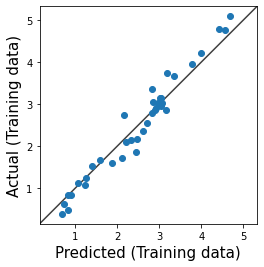

In [342]:
#Compute/plot error on training data

train_predictions = rf.predict(train_features)
train_errors = abs(train_predictions - train_labels)
print("Average absolute error for training data = ", round(np.mean(train_errors), 2), "(deaths per 1000)")

fig, ax = plt.subplots()
ax.scatter(x = train_predictions, y = train_labels)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted (Training data)', fontsize=15)
plt.ylabel('Actual (Training data)', fontsize=15)

Average absolute error =  0.6 (deaths per 1000)


Text(0, 0.5, 'Actual (Test Data)')

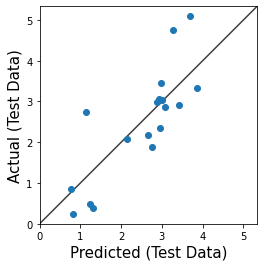

In [431]:
#Plot error on test data

fig, ax = plt.subplots()
ax.scatter(x = predictions, y = test_labels)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted (Test Data)', fontsize=15)
plt.ylabel('Actual (Test Data)', fontsize=15)

# RF Analysis with only 'important' features (i.e., corr > 0.5)

In [439]:
data_input = data.iloc[:,:-4]
data_input = data_input.set_index('Zipcode')
important_features = list(feature_importance['index'])
data_input = data_input[important_features]
features = np.array(data_input)
feature_list = list(data_input.columns)

#print(data_input.head())
#print(features[0:10,:])
print(feature_list)

###Everything after this point should be same as above

print(data[important_features])

['Latin America(%)', 'Asian(%)', 'No Degree(%)', 'Drove Alone (%)', 'Persons per household', 'Median household income (USD)', 'Black(%)', 'Per capita income (USD)', 'Walked (%)', 'White(%)', 'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'Post-grad(%)', 'Under 18(%)', 'Asia(%)', 'Median housing value', '18 to 64(%)', 'Some College(%)', 'High School(%)', "Bachelor's(%)", 'Mean travel time to work (Minutes)']
    Latin America(%)  Asian(%)  No Degree(%)  Drove Alone (%)  \
0              66.31      3.96          9.89            40.87   
1              91.67      1.39         31.66            62.28   
2              44.29      3.31         14.20            69.44   
3              38.03      4.53          5.83            39.55   
4              94.89      0.28         21.89            61.29   
5              13.02     20.67          0.78            26.12   
6              68.33      0.54         14.64            74.61   
7              82.81      0.84         17.94            68.75

In [421]:
labels_deaths = np.array(data['Death Counts(Per 1000)'])
labels_deaths

array([2.15, 3.14, 3.06, 1.68, 2.86, 0.83, 2.87, 3.03, 3.74, 1.6 , 5.09,
       2.98, 3.66, 2.15, 2.64, 1.52, 4.02, 3.37, 4.78, 3.04, 2.55, 0.71,
       4.76, 5.25, 2.7 , 1.81, 3.23, 2.74, 2.85, 2.35, 4.22, 1.73, 0.84,
       0.39, 2.92, 3.44, 1.61, 2.09, 3.13, 0.62, 2.17, 0.49, 0.62, 1.87,
       3.14, 1.24, 2.53, 3.02, 1.07, 1.12, 0.24, 2.78, 3.95, 2.95, 3.61,
       1.87, 3.32])

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels_deaths, test_size = 0.3, random_state = 0)

In [424]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (39, 21)
Training Labels Shape: (39,)
Testing Features Shape: (18, 21)
Testing Labels Shape: (18,)


In [425]:
median_deaths = np.median(labels_deaths)
baseline_pred = np.repeat(median_deaths, len(labels_deaths))
print(baseline_pred)
baseline_errors = abs(baseline_pred - labels_deaths)
print(baseline_errors)

print("Average baseline error = ", np.mean(baseline_errors), "(deaths per 1000)")

[2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74 2.74
 2.74]
[0.59 0.4  0.32 1.06 0.12 1.91 0.13 0.29 1.   1.14 2.35 0.24 0.92 0.59
 0.1  1.22 1.28 0.63 2.04 0.3  0.19 2.03 2.02 2.51 0.04 0.93 0.49 0.
 0.11 0.39 1.48 1.01 1.9  2.35 0.18 0.7  1.13 0.65 0.39 2.12 0.57 2.25
 2.12 0.87 0.4  1.5  0.21 0.28 1.67 1.62 2.5  0.04 1.21 0.21 0.87 0.87
 0.58]
Average baseline error =  0.9652631578947368 (deaths per 1000)


In [426]:
from sklearn.ensemble import RandomForestRegressor

In [427]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 17)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=17)

In [428]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")

Average absolute error =  0.6 (deaths per 1000)


Average absolute error for training data =  0.27 (deaths per 1000)


Text(0, 0.5, 'Actual (Training data)')

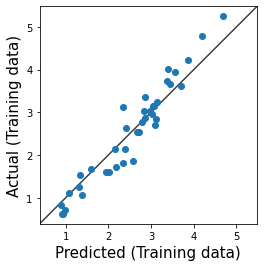

In [429]:
#Compute/plot error on training data

train_predictions = rf.predict(train_features)
train_errors = abs(train_predictions - train_labels)
print("Average absolute error for training data = ", round(np.mean(train_errors), 2), "(deaths per 1000)")

fig, ax = plt.subplots()
ax.scatter(x = train_predictions, y = train_labels)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted (Training data)', fontsize=15)
plt.ylabel('Actual (Training data)', fontsize=15)

Average absolute error =  0.6 (deaths per 1000)


Text(0, 0.5, 'Actual (Test Data)')

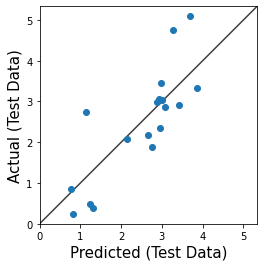

In [430]:
#Plot error on test data

fig, ax = plt.subplots()
ax.scatter(x = predictions, y = test_labels)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted (Test Data)', fontsize=15)
plt.ylabel('Actual (Test Data)', fontsize=15)

# Hyperparameter tuning

In [432]:
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint
#Available parameters:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [433]:
from sklearn.model_selection import RandomizedSearchCV

In [434]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 50)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(2, 11, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for k, v in random_grid.items():
    print(k, v, "\n")

n_estimators [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000] 

max_features ['auto', 'sqrt'] 

max_depth [5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, None] 

min_samples_split [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

min_samples_leaf [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

bootstrap [True, False] 



In [435]:
rf = RandomForestRegressor()
from sklearn.model_selection import RepeatedKFold
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = RepeatedKFold(n_splits = 2, n_repeats = 5),
                               verbose = 100, random_state = 17, n_jobs = -1)

In [436]:
import time
start_time = time.time()

rf_random.fit(train_features, train_labels)

print("--- %s seconds ---" % (time.time() - start_time))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
--- 437.3504593372345 seconds ---


In [259]:
opt1 = rf_random.best_params_

pd.DataFrame(rf_random.cv_results_)
pprint(opt1)

{'bootstrap': True,
 'max_depth': 57,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 737}


In [260]:
rf = RandomForestRegressor(n_estimators = 737, random_state = 17, max_depth=57,
                          max_features='sqrt', min_samples_leaf=1, min_samples_split=4)
rf.fit(train_features, train_labels)

RandomForestRegressor(max_depth=57, max_features='sqrt', min_samples_split=4,
                      n_estimators=737, random_state=17)

In [262]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")

Average absolute error =  0.82 (deaths per 1000)


Average absolute error for training data =  0.21 (deaths per 1000)


Text(0, 0.5, 'Actual (Training data)')

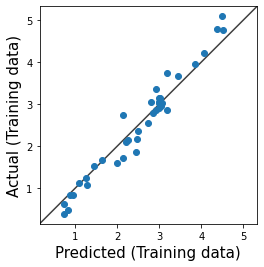

In [263]:
train_predictions = rf.predict(train_features)
train_errors = abs(train_predictions - train_labels)
print("Average absolute error for training data = ", round(np.mean(train_errors), 2), "(deaths per 1000)")

fig, ax = plt.subplots()
ax.scatter(x = train_predictions, y = train_labels)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted (Training data)', fontsize=15)
plt.ylabel('Actual (Training data)', fontsize=15)

# Feature Selection

Features selected by SelectFromModel: ['Black(%)' 'Hispanic(%)' 'Drove Alone (%)' 'Number of households'
 'Number of housing units' 'Owner Occupied (%)' 'Renter Occupied (%)'
 'Asia(%)' 'Latin America(%)']
Features selected by forward sequential selection: ['Median age' '65 and over(%)' 'Median household income (USD)'
 'Below poverty line(%)' 'Mean travel time to work (Minutes)'
 'Public Transit (%)' 'Single (%)' 'Occupied housing (%)'
 'Vacant housing (%)' 'Asia(%)']
Features selected by backward sequential selection: ['Median age' 'Under 18(%)' 'Per capita income (USD)'
 'Below poverty line(%)' 'Occupied housing (%)' 'Vacant housing (%)'
 'Owner Occupied (%)' 'Renter Occupied (%)' 'Median housing value'
 'Asia(%)']


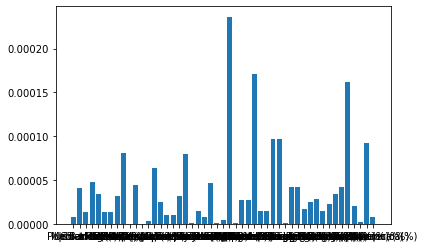

In [293]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV

X, y = train_features, train_labels

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

importance = np.abs(ridge.coef_)
feature_names = np.array(feature_list)

plt.bar(height=importance, x = feature_list)

threshold = np.sort(importance)[-10] + 0.0000001
sfm = SelectFromModel(ridge, threshold = threshold).fit(X,y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")


sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=10, direction = "forward").fit(X, y)
sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=10, direction="backward").fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)


# Dimensional Reduction

In [363]:
data_input = data.iloc[:,:-4]
data_input = data_input.set_index('Zipcode')
important_features = list(feature_importance['index'])
data_input = data_input[important_features]
features = np.array(data_input)
feature_list = list(data_input.columns)

X = data_input.values
print(X.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

(57, 21)


In [301]:
from sklearn.decomposition import PCA
pca_21 = PCA(random_state = 17)
pca_21.fit(X_scaled)
X_pca_21 = pca_21.transform(X_scaled)

78.88034301444262
69.36811639403248
9.512226620410132
_____
 [69.36811639  9.51222662]


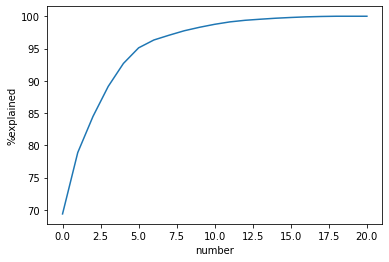

In [366]:
plt.plot(np.cumsum(pca_21.explained_variance_ratio_*100))
plt.xlabel('number')
plt.ylabel('%explained')

print(np.cumsum(pca_2.explained_variance_ratio_*100)[1])
print(np.cumsum(pca_2.explained_variance_ratio_*100)[0])
print(np.cumsum(pca_2.explained_variance_ratio_*100)[1] - np.cumsum(pca_2.explained_variance_ratio_*100)[0])


print("_____\n", pca_2.explained_variance_ratio_*100)

Text(0.5, 1.0, 'PCA Analysis of Chicago Zipcodes \nBased on Sociodemographic Characteristics \n(Colored by Total COVID-19-Related Deaths per 1,000 People)')

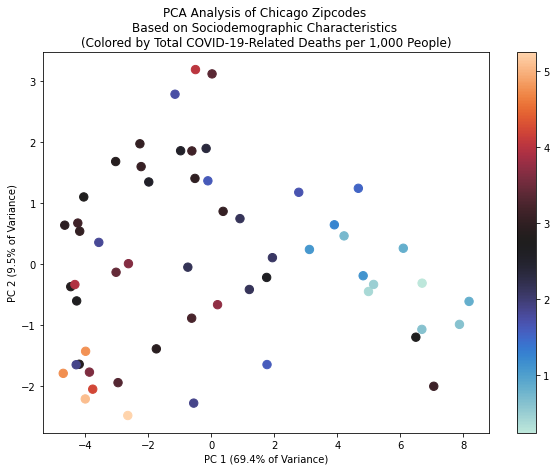

In [330]:
pca_2 = PCA(n_components=2, random_state=17)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

pc1 = X_pca_2[:,0]
pc2 = X_pca_2[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x = X_pca_2[:,0], y = X_pca_2[:,1], s = 70, c = labels_deaths, cmap = "icefire")

sm = plt.cm.ScalarMappable(cmap='icefire',
norm = plt.Normalize(vmin = np.min(labels_deaths),
                     vmax = np.max(labels_deaths)))
sm._A = []
cbar = plt.colorbar(sm)

plt.xlabel("PC 1 (69.4% of Variance)")
plt.ylabel("PC 2 (9.5% of Variance)")
plt.title("PCA Analysis of Chicago Zipcodes \nBased on Sociodemographic Characteristics \n(Colored by Total COVID-19-Related Deaths per 1,000 People)")

# Heatmaps with geopandas

In [57]:
import geopandas as gpd

In [113]:
filepath = "geo_export_0f069f65-3738-4d0d-b110-e78d1bab253a.shp"
map_df = gpd.read_file(filepath)

data["zip"] = data["Zipcode"].apply(str)
map_df_filtered = map_df[map_df["zip"].isin(data["zip"])]


#map_df_filtered.head()

map_data = map_df_filtered.merge(data, how = "left", on = "zip")


,objectid,shape_area,shape_len,zip,geometry,Zipcode,Population,Median age,Under 18(%),18 to 64(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",60647,85658,32.2,17.56,75.14,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.15,17196,200.75
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",60639,88515,34.6,26.29,62.24,...,4.69,2.99,0.61,0.00,91.67,0.03,278,3.14,24130,272.61
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",60707,42434,40.0,21.06,63.60,...,42.45,11.93,0.98,0.00,44.29,0.34,130,3.06,4235,99.80
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",60622,52957,32.2,13.41,79.84,...,38.17,19.04,1.60,0.50,38.03,2.65,89,1.68,11074,209.11
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",60651,63679,33.9,26.37,61.38,...,1.55,2.46,0.89,0.00,94.89,0.21,182,2.86,14030,220.32


In [141]:
def plot_heatmap(df, feature, palette, title = "feature"):
    
    """
    Plots a colored heatmap from geographic data.
    
    input 'df' should be a GeoPandas dataframe
    'feature' is the name of the variable from 'df' that you want to plot
    'palette' is a pyplot color palette
    'title' is the figure title; by default it is the same as the plotted variable name
    """
    
    
    fig, ax = plt.subplots(1, figsize = (10,10))
    map_data.plot(column = feature, cmap = palette, linewidth = 0.8, ax = ax, edgecolor = "0.8")
    ax.axis("off")
    if title == "feature":
        ax.set_title(feature)
    else:
        ax.set_title(title)

    sm = plt.cm.ScalarMappable(cmap=palette,
    norm = plt.Normalize(vmin = np.min(map_data[feature]),
                         vmax = np.max(map_data[feature])))
    sm._A = []
    cbar = fig.colorbar(sm)

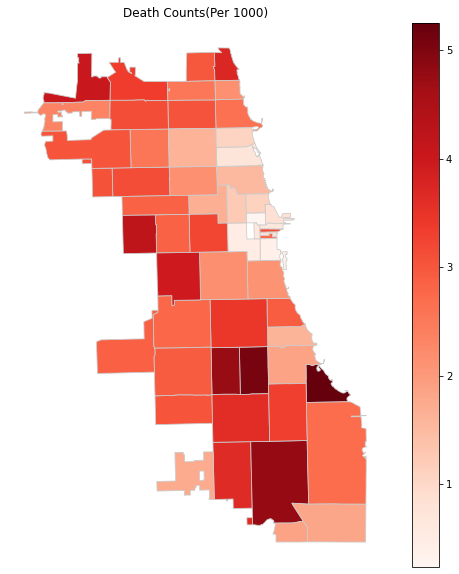

In [142]:
plot_heatmap(map_data, "Death Counts(Per 1000)", "Reds")

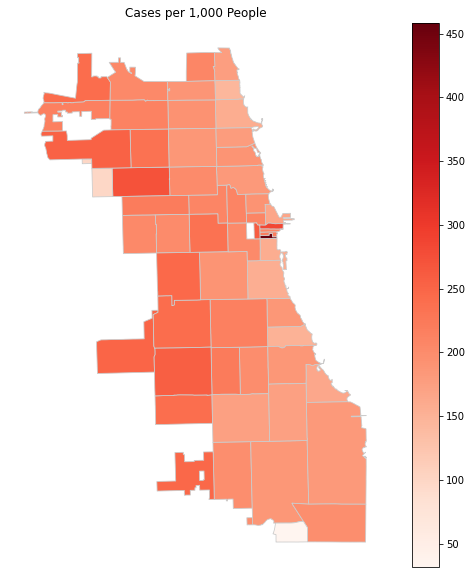

In [152]:
plot_heatmap(map_data, "Case Counts(Per 1000)", "Reds", "Cases per 1,000 People")

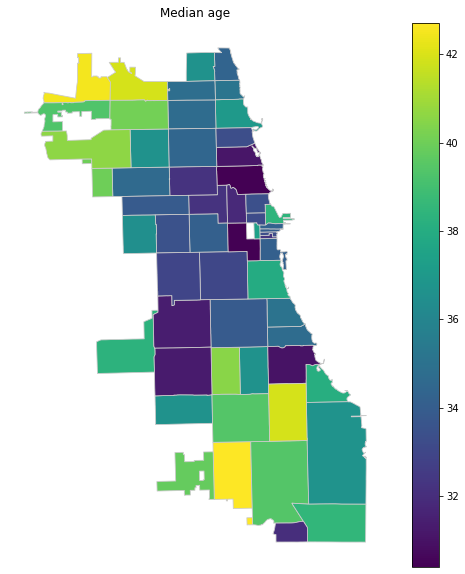

In [147]:
plot_heatmap(map_data, "Median age", "viridis")

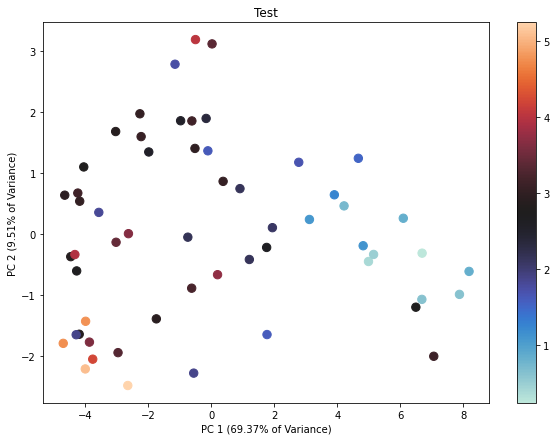

In [413]:
#Test PCA functions

def scale_df(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled

def PCA_2(X, random_state = 17):
    pca_2 = PCA(n_components = 2, random_state = random_state)
    X_scaled = scale_df(X)
    pca_2.fit(X_scaled)
    X_pca_2 = pca_2.transform(X_scaled)
    return pca_2, X_pca_2

def plot_pca(pca_data, pca_model, labels, title, cmap = "icefire"):
    pc1 = pca_data[:,0]
    pc2 = pca_data[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x = pc1, y = pc2, s = 70,
                c = labels, cmap = cmap)
    sm = plt.cm.ScalarMappable(cmap = cmap,
                               norm = plt.Normalize(vmin = np.min(labels), 
                                                    vmax = np.max(labels)))
    sm._A = []
    cbar = plt.colorbar(sm)
    
    perc_explained = pca_model.explained_variance_ratio_*100
    expl_1 = round(perc_explained[0],2)
    expl_2 = round(perc_explained[1],2)
    
    plt.xlabel("PC 1 (" + str(expl_1) + "% of Variance)")
    plt.ylabel("PC 2 (" + str(expl_2) + "% of Variance)")
    plt.title(title)
    plt.show()
    
scaled = scale_df(X)
pca2, xpca2 = PCA_2(scaled)
pca2.explained_variance_ratio_
plot_pca(xpca2, pca2, labels_deaths, "Test")

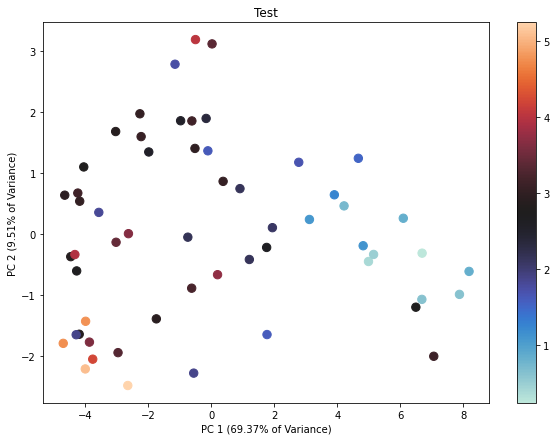

In [417]:
from PCA_analysis import *